<a href="https://colab.research.google.com/github/palanithanarajk/FDP/blob/master/dataxda1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we first try to understand the data import and data exploration in Jupyter Notebook.
First "Hello,World!"

In [0]:
print ("Hello, World!")

Hello, World!


Pandas: Data read from CSV file

In [0]:
import pandas as pd
#data = pd.read_csv('diabetes.csv')

from google.colab import files
uploaded = files.upload()
# Display data frame


Saving diabetes.csv to diabetes.csv


View data files using head and tail operations

In [0]:
data = pd.read_csv('diabetes.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

Check whether NAN is present in the datafile

In [0]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

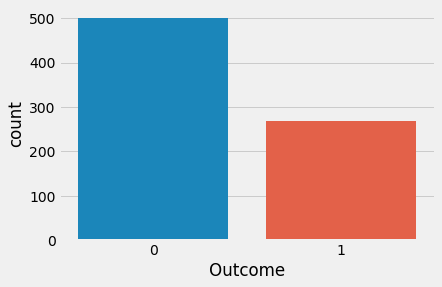

In [0]:
sns.countplot(x='Outcome',data=data)
plt.show()

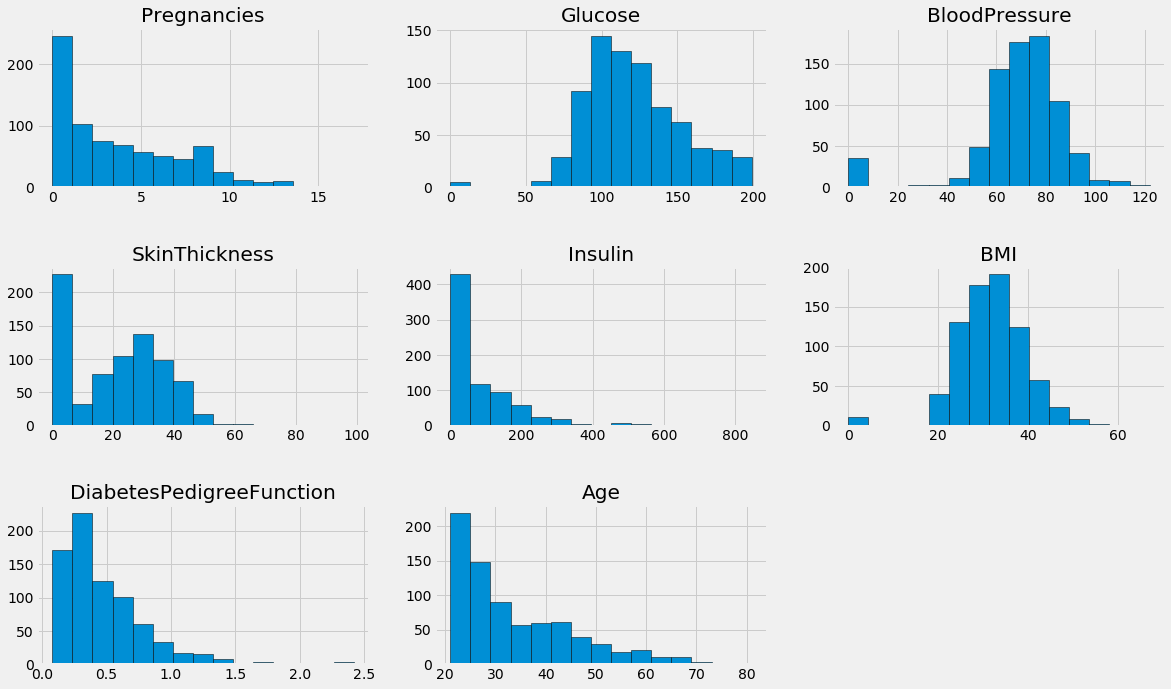

In [0]:
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=15,edgecolor='black')
    plt.title(i)
plt.show()

Feature Standardization

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(data[data.columns[:8]])
datax=pd.DataFrame(rescaledX, columns=data.columns[:8]) 

datax['Outcome']=data['Outcome']
datax.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [0]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [0]:
diab=datax
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [0]:

lda = LDA(n_components=1)
X_train = lda.fit_transform(train_X, train_Y)
prediction=lda.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


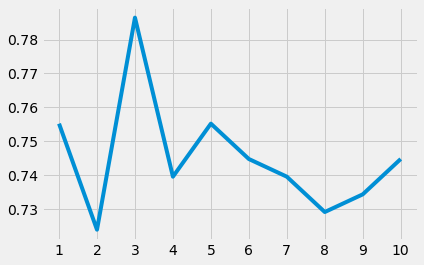

Accuracies for different values of n are: [0.75520833 0.72395833 0.78645833 0.73958333 0.75520833 0.74479167
 0.73958333 0.72916667 0.734375   0.74479167]


In [0]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [0]:
maxpos = max(a)
print(maxpos)

0.7864583333333334


In [0]:
types=['rbf','linear']

for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.7708333333333334
Accuracy for SVM kernel= linear is 0.765625


In [0]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts


In [0]:
xyz=[]
accuracy=[]

classifiers=['Linear Svm','Radial Svm','LDA','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LDA(n_components=2),KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    cv_result = cross_val_score(model,diab[columns[:8]],diab['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(xyz,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.770796
Radial Svm,0.763004
LDA,0.773462
KNN,0.744754


In [0]:
box=pd.DataFrame(accuracy,index=[classifiers])
box


,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.675325,0.831169,0.753247,0.714286,0.779221,0.792208,0.818182,0.831169,0.723684,0.789474
Radial Svm,0.688312,0.818182,0.714286,0.662338,0.792208,0.779221,0.831169,0.831169,0.736842,0.776316
LDA,0.701299,0.831169,0.753247,0.675325,0.779221,0.766234,0.844156,0.818182,0.763158,0.802632
KNN,0.675325,0.831169,0.714286,0.727273,0.701299,0.740260,0.766234,0.831169,0.697368,0.763158


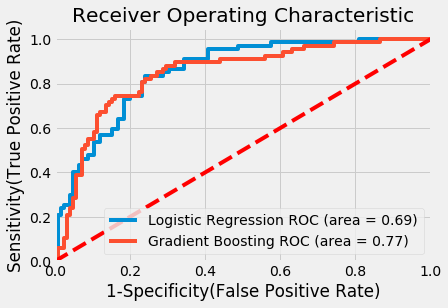

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(train_X,train_Y) # train the model
   # y_pred=model.predict(test_X) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(test_Y, model.predict_proba(test_X)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_Y,model.predict(test_X))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display